In [1]:
import numpy as np
import torch.nn as nn
from my_dataset import MyDataset 
from voting_model import MyVoter, MyTrainedModel, MyNN, MyLinear
print("done")

done


In [2]:
"""
Train NN using full superfeature1 dataset
"""

train_filepaths = ["superfeatures1/train.csv"]
test_filepaths = ["superfeatures1/test.csv"]
train_loader = MyDataset.get_loader(train_filepaths, shuffle=True, batch_size=16, num_workers=0)
test_loader = MyDataset.get_loader(test_filepaths, batch_size=16, num_workers=0)

num_classes = 9
model_name = "nn_full_superfeatures1"
max_epochs = 8
num_features = train_loader.dataset.datasets[0].num_features
model_body = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes))
loss_fn = nn.CrossEntropyLoss()
nn1 = MyNN(model_name, max_epochs, num_classes, num_features, model_body, loss_fn)
nn1.fit(train_loader)
print("done")

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3070 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 1.2 M  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
---------------------------------------------------

Epoch 7: 100%|██████████| 808/808 [00:05<00:00, 145.40it/s, v_num=15, train_acc=0.667]

`Trainer.fit` stopped: `max_epochs=8` reached.


Epoch 7: 100%|██████████| 808/808 [00:05<00:00, 144.08it/s, v_num=15, train_acc=0.667]
Fit Time (s): 45.295602560043335
done


In [3]:
"""
NN2 using full data and deeper body
"""
train_filepaths = ["superfeatures1/train.csv"]
test_filepaths = ["superfeatures1/test.csv"]
train_loader = MyDataset.get_loader(train_filepaths, shuffle=True, batch_size=16, num_workers=0)
test_loader = MyDataset.get_loader(test_filepaths, batch_size=16, num_workers=0)

num_classes = 9
model_name = "nn_full_superfeatures1"
max_epochs = 8
num_features = train_loader.dataset.datasets[0].num_features
model_body = nn.Sequential(
    nn.Linear(num_features, 700),
    nn.ReLU(),
    nn.Linear(700, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes))
loss_fn = nn.CrossEntropyLoss()
nn2 = MyNN(model_name, max_epochs, num_classes, num_features, model_body, loss_fn)
nn2.fit(train_loader)
print("done")

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 2.0 M  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
2.0 M     Trainable params
0         Non-trainable params
2.0 M     Total params
7.887     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode


Epoch 7: 100%|██████████| 808/808 [00:06<00:00, 129.67it/s, v_num=16, train_acc=0.667]

`Trainer.fit` stopped: `max_epochs=8` reached.


Epoch 7: 100%|██████████| 808/808 [00:06<00:00, 127.62it/s, v_num=16, train_acc=0.667]
Fit Time (s): 48.84950041770935
done


In [4]:
"""
Train Linear1 using full superfeature1 dataset
"""

train_filepath = "my_data/superfeatures1/train.csv"
test_filepath = "my_data/superfeatures1/test.csv"

train_data = np.loadtxt(train_filepath, delimiter=",", skiprows=1)
test_data  = np.loadtxt(test_filepath,  delimiter=",", skiprows=1)

train_X, train_y = train_data[:, :-1], train_data[:, -1].astype(int)
test_X,  test_y  = test_data[:, :-1],  test_data[:, -1].astype(int)

num_classes = 9
num_features = train_X.shape[1]
print(num_features)
linear1 = MyLinear(num_classes, num_features)
linear1.fit(train_X, train_y)
print("done")

2112
done


In [5]:
"""
Train Linear2 without mean or std used (first 320 columns)
"""

train_filepath = "my_data/superfeatures1/train.csv"
test_filepath = "my_data/superfeatures1/test.csv"

train_data = np.loadtxt(train_filepath, delimiter=",", skiprows=1)
test_data  = np.loadtxt(test_filepath,  delimiter=",", skiprows=1)

train_X2, train_y = train_data[:, 320:-1], train_data[:, -1].astype(int)
test_X2,  test_y  = test_data[:, 320:-1],  test_data[:, -1].astype(int)

num_classes = 9
num_features = train_X2.shape[1]
print(num_features)
linear2 = MyLinear(num_classes, num_features)
linear2.fit(train_X2, train_y)
print("done")

1792
done


In [6]:
"""
Train Linear3 without mean or std used (first 320 columns) and without last 320 cols (90R,90C,10R,10C)
"""

train_filepath = "my_data/superfeatures1/train.csv"
test_filepath = "my_data/superfeatures1/test.csv"

train_data = np.loadtxt(train_filepath, delimiter=",", skiprows=1)
test_data  = np.loadtxt(test_filepath,  delimiter=",", skiprows=1)

train_X3, train_y = train_data[:, 320:-321], train_data[:, -1].astype(int)
test_X3,  test_y  = test_data[:, 320:-321],  test_data[:, -1].astype(int)

num_classes = 9
num_features = train_X3.shape[1]
print(num_features)
linear3 = MyLinear(num_classes, num_features)
linear3.fit(train_X3, train_y)
print("done")

1472
done


In [7]:

num_classes = 9
trained_models = np.array([
    MyTrainedModel(nn1, num_classes, train_X), 
    MyTrainedModel(nn2, num_classes, train_X),
    MyTrainedModel(linear1, num_classes, train_X), 
    MyTrainedModel(linear2, num_classes, train_X2), 
    MyTrainedModel(linear3, num_classes, train_X3), 
    ])
voter = MyVoter(trained_models, num_classes, train_y, "nn1_linear1_superfeatures1", "train.csv")
voter.set_probs()
voter.save_csv()
print("done")

done


[0.78079752 0.94572203 0.95958188 0.97197058 0.97506775 0.98087495
 0.99790941 1.         1.        ]

[0.79109563 0.95927216 0.99403794 0.99829655 0.99992257 1.
 1.         1.         1.        ]

[0.78373984 0.94603175 0.9831204  0.99132791 0.99837398 0.99976771
 0.99992257 1.         1.        ]

[0.64467673 0.80727836 0.91180798 0.95555556 0.96686024 0.97537747
 0.99264421 1.         1.        ]

[0.64374758 0.80325203 0.91064654 0.9559427  0.96747967 0.97537747
 0.99264421 1.         1.        ]

[0.64560588 0.80588463 0.90987224 0.95029036 0.96562137 0.9754549
 0.99256678 1.         1.        ]

done


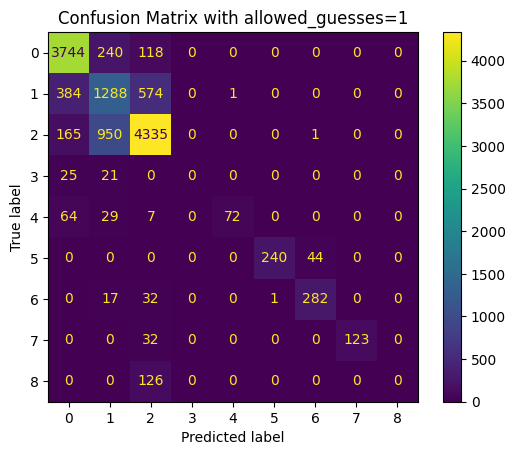

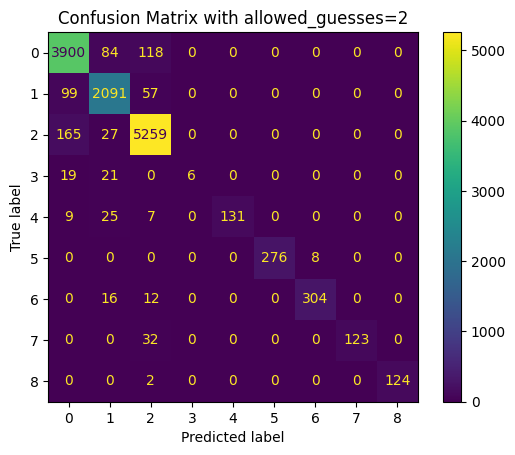

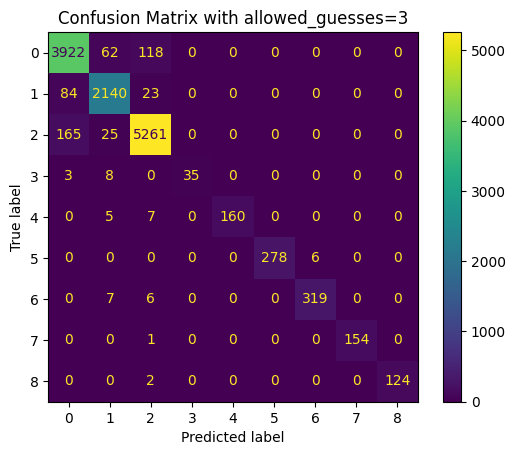

In [8]:
acc = voter.get_acc()
models_acc = voter.get_models_acc()

print(voter.get_acc())
print()
for m in models_acc:
    print(m)
    print()

print("done")

# voter.diplay_confusion_matrix(0)
voter.diplay_confusion_matrix(1)
voter.diplay_confusion_matrix(2)
voter.diplay_confusion_matrix(3)


In [ ]:
#  i need to load train.csv from my_voter into a loader and then make aNN with it
# I then need to have test.csv and do the same with that